# Ordinal Patterns and Permutation Entropy

In this video we look at ordinal patterns and permutation entropy with a trading application in mind. Ordinal patterns are a useful tool for algorithmic trading. We discuss a few applications of ordinal patterns for trading system development and look at permutation entropy as a trading indicator. Permutation entropy can be useful for filtering trades. Certain strategies may perform better/worse when the entropy is high/low.  Python code is shown and explained for ordinal pattern mapping and permutation entropy. 

* Tutorial: [Ordinal Patterns and Permutation Entropy | Algorithmic Trading Indicator](https://www.youtube.com/watch?v=PsQbKJvpGDU)
* Full Code: https://github.com/neurotrader888/PermutationEntropy

Citation

[Unakafova VA, Keller K. Efficiently Measuring Complexity on the Basis of Real-World Data. Entropy. 2013; 15(10):4392-4415](https://www.mdpi.com/1099-4300/15/10/4392)

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def ordinal_patterns(arr: np.array, d: int) -> np.array:
    assert(d >= 2)
    fac = math.factorial(d);
    d1 = d - 1
    mults = []
    for i in range(1, d):
        mult = fac / math.factorial(i + 1)
        mults.append(mult)
   
    # Create array to put ordinal pattern in
    ordinals = np.empty(len(arr))
    ordinals[:] = np.nan

    for i in range(d1, len(arr)):
        dat = arr[i - d1:  i+1] 
        pattern_ordinal = 0
        for l in range(1, d): 
            count = 0
            for r in range(l):
                if dat[d1 - l] >= dat[d1 - r]:
                   count += 1
             
            pattern_ordinal += count * mults[l - 1]
        ordinals[i] = int(pattern_ordinal)
    
    return ordinals

In [3]:
def permutation_entropy(arr: np.array, d:int, mult: int) -> np.array:
    fac = math.factorial(d)
    lookback = fac * mult
    
    ent = np.empty(len(arr))
    ent[:] = np.nan
    ordinals = ordinal_patterns(arr, d)
    
    for i in range(lookback + d - 1, len(arr)):
        window = ordinals[i - lookback + 1 :i+1]
        
        # Create distribution
        freqs = pd.Series(window).value_counts().to_dict()
        for j in range(fac):
            if j in freqs:
                freqs[j] = freqs[j] / lookback
       
        # Calculate entropy
        perm_entropy = 0.0
        for k, v in freqs.items():
            perm_entropy += v * math.log2(v)

        # Normalize to 0-1
        perm_entropy = -1. * (1. / math.log2(fac)) * perm_entropy
        ent[i] = perm_entropy
        
    return ent 

In [4]:
# Load data

data = pd.read_csv('src/BTCUSDT3600V.csv')
data['date'] = data['date'].astype('datetime64[s]')
data = data.set_index('date')

In [5]:
plt.style.use('dark_background')
data['perm_entropy'] = permutation_entropy(data['close'].to_numpy(), 3, 28)
data['vol_perm_entropy'] = permutation_entropy(data['volume'].to_numpy(), 3, 28)

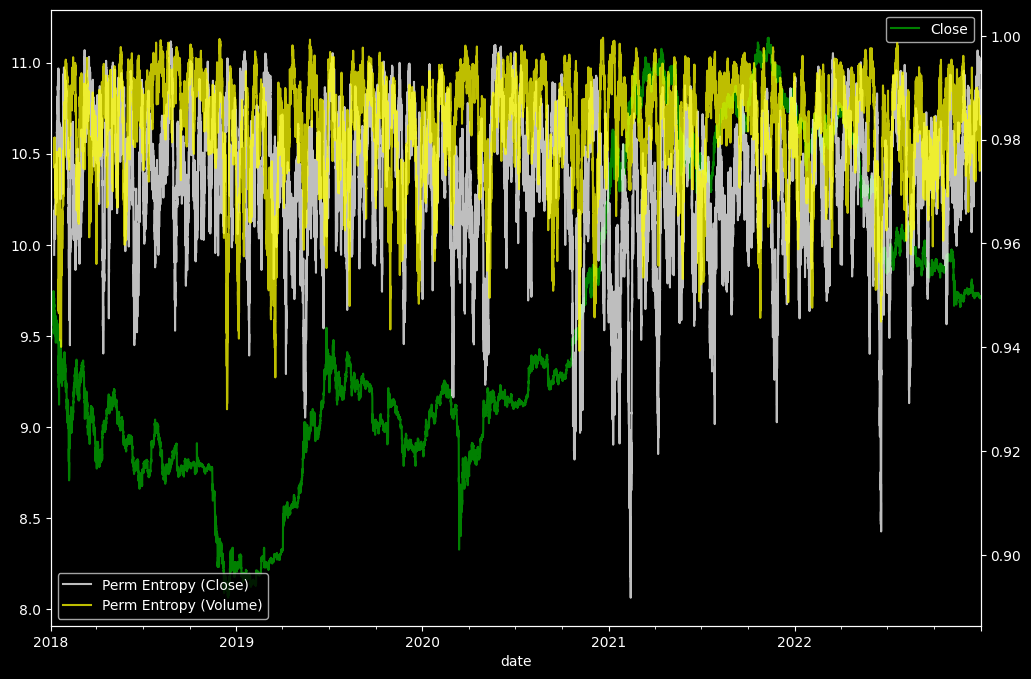

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 8))
np.log(data['close']).plot(ax=ax1, color='green', label='Close')
ax2 = ax1.twinx()     
data['perm_entropy'].plot(ax=ax2, color='white', alpha=0.75, label='Perm Entropy (Close)')
data['vol_perm_entropy'].plot(ax=ax2, color='yellow', alpha=0.75, label='Perm Entropy (Volume)')
ax1.legend()
plt.legend()
plt.show()